## INTRODUCTION:   
### Predicting Customer Subscription to Term Deposits Using Bank Marketing Data


### Summary
1.Business Understanding

2.Data Understanding

3.Data Preparation

4.Business Analysis

5.Modeling

6.Evaluation

7.Code Quality

## 1. Business Understanding
In this notebook, I am dealing with the data of a marketing campaign in our bank. .The primary goal is to predict whether a client will subscribe to a term deposit. This helps the bank focus its marketing efforts on clients with a higher probability of a positive response.

   ### 1.1 Problem Statement
   The bank is running marketing campaigns to promote term deposit subscriptions, but the conversion rate is relatively low.        Each campaign involves contacting thousands of clients, many of whom are not interested or eligible. This results in wasted      resources, increased operational costs, and reduced marketing efficiency.
  
  A successful predictive model enables the bank to:
  + . Focus marketing efforts on customers most likely to convert.
  + . Reduce operational costs by minimizing unnecessary calls.

  ### 1.2 Stakeholders for the Bank Marketing Campaign Project
 Identifying stakeholders is important to ensure that the insights and models developed from the bank marketing dataset are       aligned with business goals.
 
 ###### The key Stakeholders are:
+ .Marketing Team: Optimize campaign targeting and messaging strategies.

+ .Sales Executive: Increase conversion rates and ROI from outreach efforts.

+ .Data Analysts: Build and evaluate predictive models; uncover meaningful customer patterns.
 

### 1.3 OBJECTIVES

+ .Which customer attributes most strongly influence the likelihood of customers  subscribing to a term deposit?

+ .How do campaign related factors influence the likelihood of a customer subscribing to a term deposit?

+ .Can we accurately predict whether a customer will subscribe using machine learning models?




## 2.Data Understanding

   ### Dataset Overview
   + .Source :The data source for this analysis is from **Kaggle** - Bank Marketing Campaign Dataset. 
 
   + .Features: 16 input features + 1 target (deposit)

   ### 2.1 Load The Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df=pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


  ### 2.2 Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df.shape

(11162, 17)

In [5]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


## 3.Data Preparation

### 3.1 Handling Missing Values and Duplicates

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11157    False
11158    False
11159    False
11160    False
11161    False
Length: 11162, dtype: bool

### 3.2. Handling Categorical Variables

In [9]:
# Categorical features:
categorical_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()

# Numerical features:

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


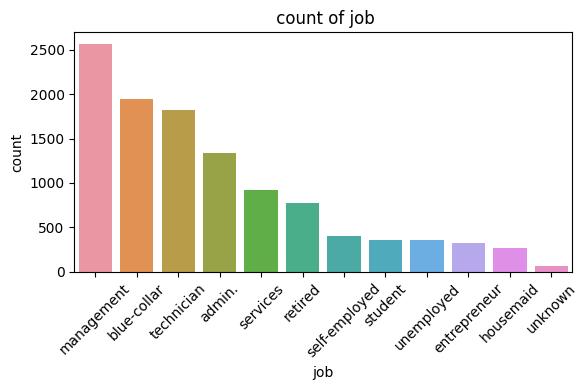

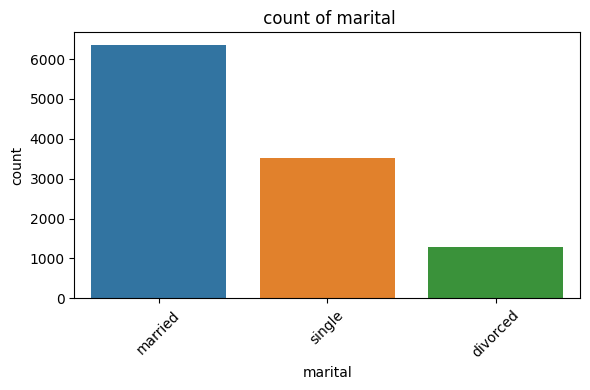

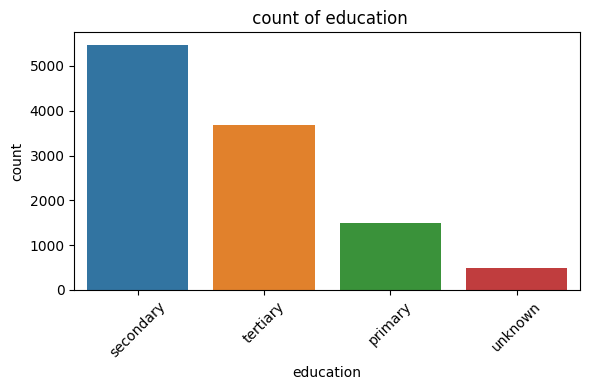

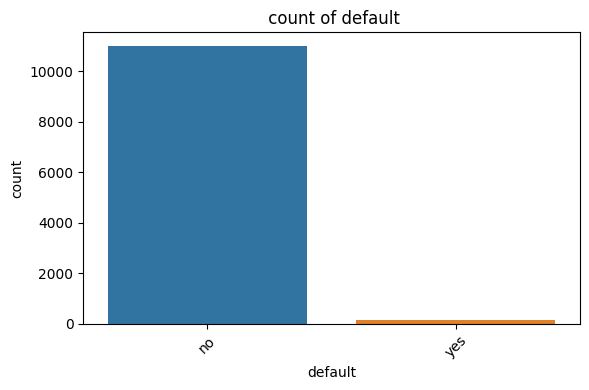

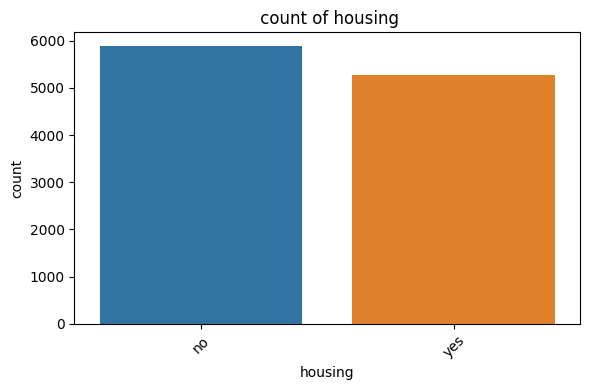

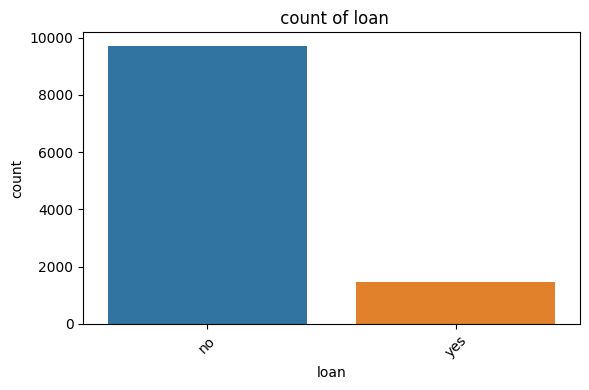

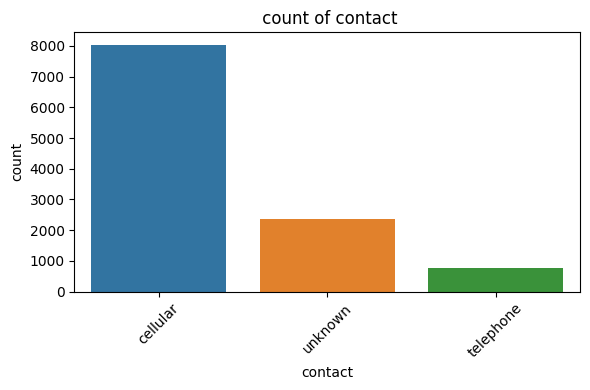

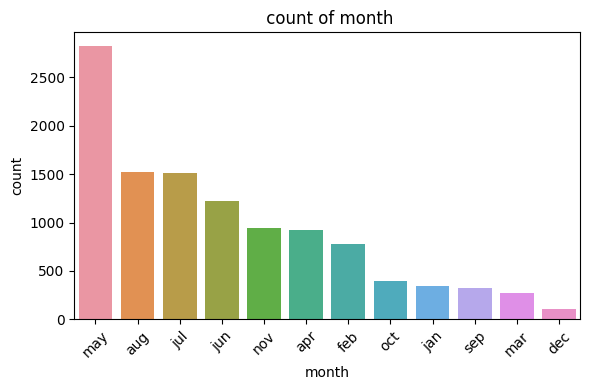

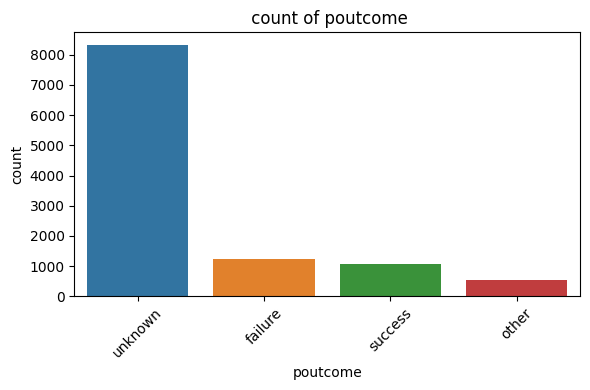

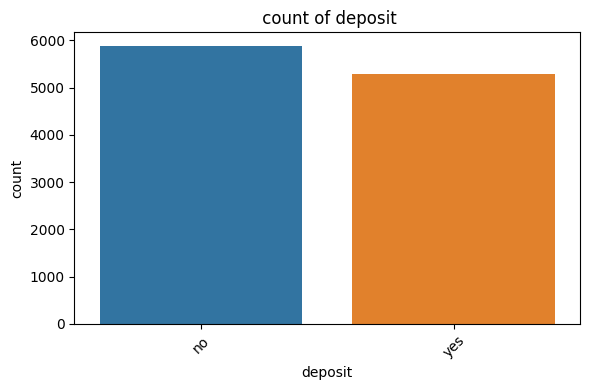

In [10]:
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f" count of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 4. BUSINESS ANALYSIS

+ In this section, we are going to look at the top reason why a cutomer is likely to Subscribe  to Term Deposits. This analysis will help us create retention strategies

### 4.1 Customer Segmentation Objective

In [11]:
# Which customer attributes most strongly influence the likelihood of customers subscribing to a term deposit
# Group by age and count the number of 'yes' deposits

yes_counts = df[df['deposit'] == 'yes'].groupby('age').size()
total_counts = df.groupby('age').size()
age_yes_rate = (yes_counts / total_counts).sort_values(ascending=False)

print(age_yes_rate.head(10))


age
95    1.000000
93    1.000000
92    1.000000
90    1.000000
84    1.000000
79    1.000000
64    0.945946
71    0.925926
68    0.875000
18    0.875000
dtype: float64


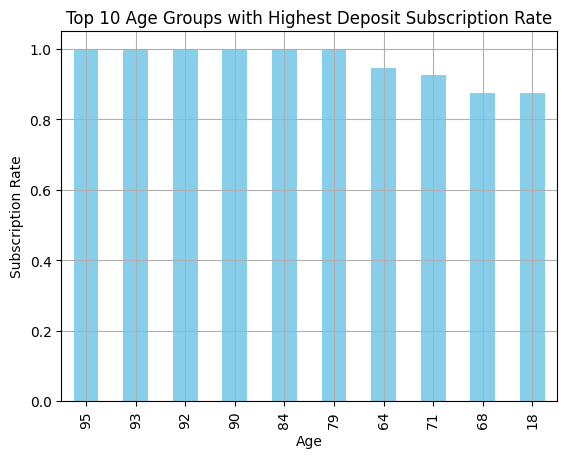

In [12]:
#plotting
age_yes_rate.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Age Groups with Highest Deposit Subscription Rate')
plt.xlabel('Age')
plt.grid()
plt.ylabel('Subscription Rate')
plt.show()

#### Interpretation

+ Ages 79, 84, 90, 92, 93, and 95 all have nearly 100% subscription rates.

+ This likely indicates that when customers in these older age groups are contacted, they're very likely to subscribe possibly due to financial stability or retirement planning.

### 4.2 Campaign Optimization Objective

In [13]:
#How do campaign related factors influence the likelihood of a customer subscribing to a term deposit?
# Group by month and count the number of 'yes' deposits

yes_by_month = df[df['deposit'] == 'yes'].groupby('month').size()

total_by_month = df.groupby('month').size()

month_rate = (yes_by_month / total_by_month).sort_values(ascending=False)

print(month_rate)

month
dec    0.909091
mar    0.898551
sep    0.843260
oct    0.823980
apr    0.625135
feb    0.568299
aug    0.452930
jun    0.446809
nov    0.427359
jul    0.414135
jan    0.412791
may    0.327550
dtype: float64


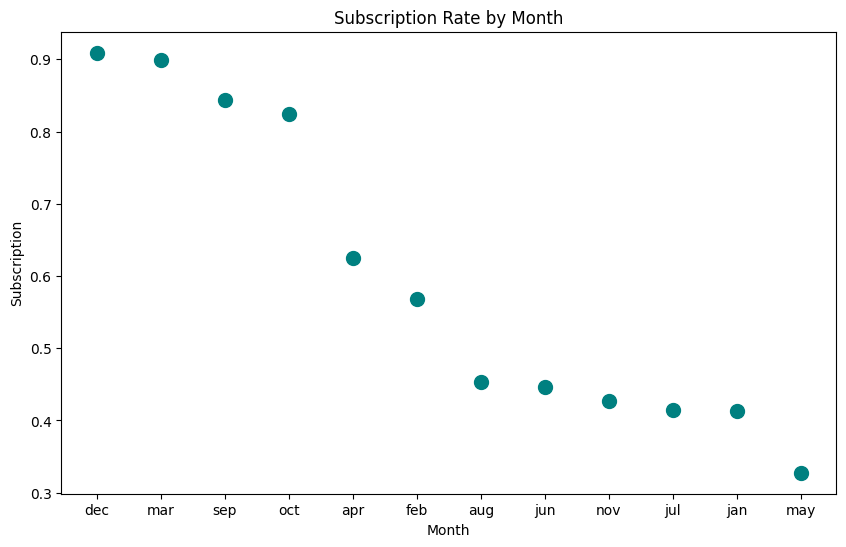

In [14]:
#plotting

plt.figure(figsize=(10, 6))
plt.scatter(month_rate.index, month_rate.values, color='teal', s=100)
plt.title('Subscription Rate by Month')
plt.xlabel('Month')
plt.ylabel('Subscription')
plt.show()

#### Interpretation

+ December,March and September are the months that show the strongest likelihood of customers subscribing to a term deposit which can be due to end of year financial planning.

+ January and May, may see less subscribing rates.

## 5.Predictive Modeling

building and evaluating machine learning models to predict whether a customer will subscribe to a term deposit.I will begin with Logistic Regression as a baseline model due to its interpretability. I refine the predictions using a Decision Tree model, which captures complex patterns in customer behavior more effectively, leading to improved accuracy and performance in term deposit prediction.

In [15]:
#dealing with multi-categorical variables
multi_cat_cols = ['job', 'marital', 'education', 'month', 'poutcome','contact']
df1 = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True, dtype=int)
df1


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,contact_telephone,contact_unknown
0,59,no,2343,yes,no,5,1042,1,-1,0,...,0,1,0,0,0,0,0,1,0,1
1,56,no,45,no,no,5,1467,1,-1,0,...,0,1,0,0,0,0,0,1,0,1
2,41,no,1270,yes,no,5,1389,1,-1,0,...,0,1,0,0,0,0,0,1,0,1
3,55,no,2476,yes,no,5,579,1,-1,0,...,0,1,0,0,0,0,0,1,0,1
4,54,no,184,no,no,5,673,2,-1,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,no,1,yes,no,20,257,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
11158,39,no,733,no,no,16,83,4,-1,0,...,0,0,0,0,0,0,0,1,0,1
11159,32,no,29,no,no,19,156,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
11160,43,no,0,no,yes,8,9,2,172,5,...,0,1,0,0,0,0,0,0,0,0


In [16]:
# Label Encoding for binary categories:

from sklearn.preprocessing import LabelEncoder

binary_cols = ['default', 'housing', 'loan', 'deposit']

le = LabelEncoder()
for col in binary_cols:
    df1[col] = le.fit_transform(df[col])


In [17]:
df1.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'deposit', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'contact_telephone', 'contact_unknown'],
      dtype='object')

## 5.0 Customer attributes Objective
To determine if customer attributes which strongly influence the likelihood of customers subscribing to a term deposit like age, job type,education, marital and balance


### Regularization in Logistic Regression
 TO build logistic models to predict deposit using customer attributes and to identify which attributes are most predictive on deposit subscription

In [18]:
# Define features and target
X1 = df1[['age','balance','job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown','housing', 'loan']]

y1 = df1['deposit']


In [19]:
# Splitting data
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=2)

In [20]:
from sklearn.linear_model import LogisticRegression

ridge = LogisticRegression(penalty='l2', solver='liblinear')
lasso = LogisticRegression(penalty='l1', solver='liblinear')

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

ridge_coefs = ridge.coef_.flatten()
lasso_coefs = lasso.coef_.flatten()

In [21]:
print(ridge_coefs.shape, X_train.columns.shape)

(20,) (20,)


In [22]:
# ridge and lasso coefficients
coefs_df = pd.DataFrame({'Feature': X_train.columns, 'Ridge_Coefficient': ridge_coefs, 'Lasso_Coefficient': lasso_coefs})

coefs_df = coefs_df.sort_values(by='Lasso_Coefficient', key=abs, ascending=False)

print(coefs_df)

                Feature  Ridge_Coefficient  Lasso_Coefficient
9           job_student           0.806083           0.809405
6           job_retired           0.593672           0.627679
18              housing          -0.597724          -0.604343
16   education_tertiary           0.577450           0.539576
19                 loan          -0.452181          -0.454604
3      job_entrepreneur          -0.422010          -0.383742
4         job_housemaid          -0.368227          -0.331249
11       job_unemployed           0.324631           0.325304
7     job_self-employed          -0.284632          -0.257992
15  education_secondary           0.261959           0.239424
14       marital_single           0.220947           0.201953
5        job_management          -0.213405          -0.177577
2       job_blue-collar          -0.184567          -0.165665
17    education_unknown           0.161371           0.138559
8          job_services          -0.143219          -0.118609
13      

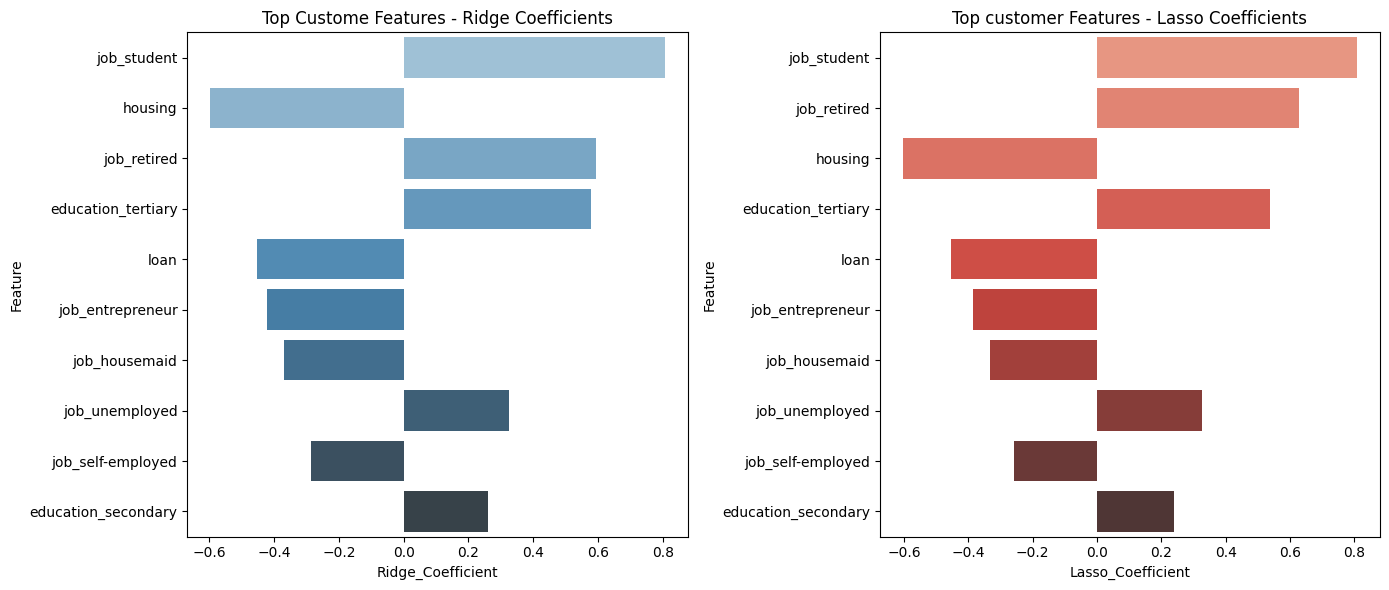

In [23]:
top_n = 10
top_features = coefs_df.head(top_n)  

ridge = top_features[['Feature', 'Ridge_Coefficient']].sort_values(by='Ridge_Coefficient', key=abs, ascending=False)
lasso = top_features[['Feature', 'Lasso_Coefficient']].sort_values(by='Lasso_Coefficient', key=abs, ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Ridge plot
sns.barplot(x='Ridge_Coefficient', y='Feature', data=ridge, palette='Blues_d', ax=ax[0])
ax[0].set_title("Top Custome Features - Ridge Coefficients")
ax[0].tick_params(axis='y', labelsize=10)

# Lasso plot
sns.barplot(x='Lasso_Coefficient', y='Feature', data=lasso, palette='Reds_d', ax=ax[1])
ax[1].set_title("Top customer Features - Lasso Coefficients")
ax[1].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

### interpretation

+ job_student : Students are highly likely to subscribe to term deposits.
+ job_retired : Retired individuals also show strong interest in subscriptions.
+ education_tertiary : Customers with tertiary education are more inclined to subscribe.

+ housing : Customers with housing loans are less likely to subscribe.
+ loan : Having a loan decreases the likelihood of subscription.
+ job_entrepreneur, job_housemaid, job_self-employed : These  types jobs have  negative impact on subscription rates compared to others.

## 5.1 Campaign Optimization Objective:
To evaluate how do campaign-related factors like ['duration','day','campaign'] influence the likelihood of a customer subscribing to a term deposit

### Logistic Regression Analysis

predict which customers are most likely to respond positively 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score

In [25]:
# Define features and target
X = df1[['duration','day','campaign','contact_telephone', 'contact_unknown']]
y = df1['deposit']


In [26]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.preprocessing import StandardScaler
#scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
#Handling imbalance using class weight, training and fitting

model = LogisticRegression(class_weight="balanced",max_iter= 2000 ,random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

In [29]:
#Evaluating the model

y_pred = model.predict(X_test_scaled) 
y_proba = model.predict_proba(X_test_scaled)[:, 1] 

# Evaluate
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1166
           1       0.75      0.70      0.72      1067

    accuracy                           0.74      2233
   macro avg       0.74      0.74      0.74      2233
weighted avg       0.74      0.74      0.74      2233

ROC-AUC: 0.8340070346798787


### Interpratation
The model achieves 74% accuracy , meaning it correctly predicts whether a customer will subscribe to a term deposit .

0 means customers did not  subscribe to a term deposit while  1 means customers subscribed.

Precision- 74% of customers did not  subscribe, while 75% of the prediction did actually subscribe

Recall - The model was able to identify 78% of non_subscribers and 70% of subscribers

Accuracy - this shows 74% of the prediction is correct

ROC-AUC - At 83.4%, indicates that the model has a very strong ability to distinguish between customers who will and won't subscribe to a term deposit.


### confusion matrix to see how many true positive and false positives we have on campaigns

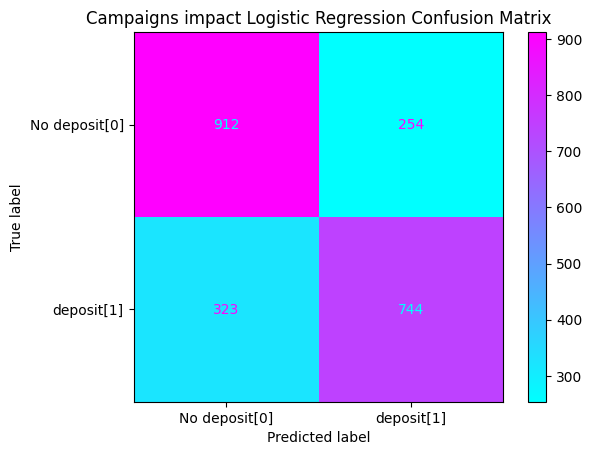

In [30]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

con_matrix = confusion_matrix(y_test, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=["No deposit[0]", "deposit[1]"])
disp.plot(cmap='cool')
plt.title("Campaigns impact Logistic Regression Confusion Matrix")
plt.show()


+ True Negative (TN) = 912
+ False Positive (FP) = 254
+ False Negative (FN= 323
+ True Positive (TP)  = 744

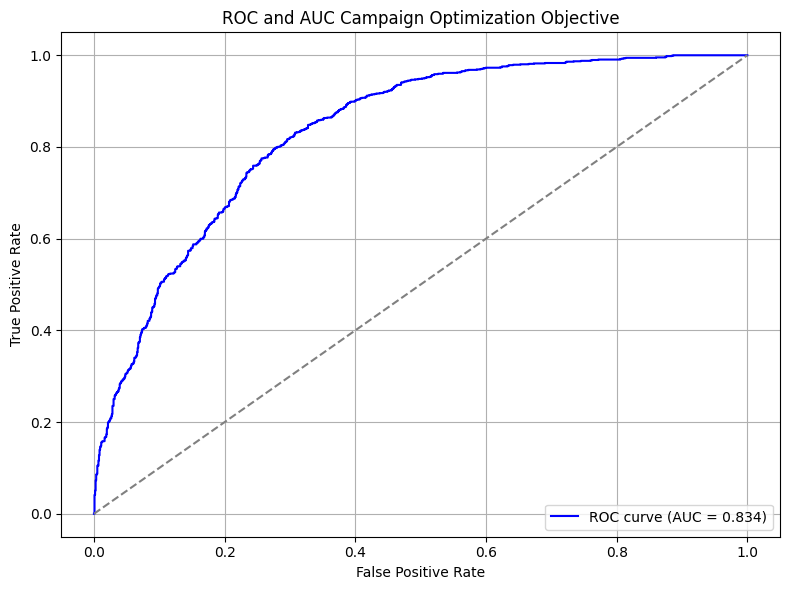

In [31]:
# ROC and AUC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC Campaign Optimization Objective')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Interpretation
The ROC curve and AUC value (0.834) indicate that the model using age , job ,Contact and education as features performs reasonably well in predicting term deposit subscriptions

## 5.2 Determine whether a customer will subscribe to a term deposit using machine learning models 
 
  

 ### Decision Tree Classification

+ To predict whether a customer subscribes to a term deposit.



In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [33]:
# Define features and target
X2 = df1.drop(['deposit'],axis=1)
y2 = df1['deposit']

In [34]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y1)

In [35]:
#Training the decision Tree
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)  
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [36]:
#model evaluation 
y_pred_2 = tree_clf.predict(X_test)
y_proba_2 = tree_clf.predict_proba(X_test)[:, 1]  

print(classification_report(y_test, y_pred_2))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_2))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1175
           1       0.79      0.80      0.79      1058

    accuracy                           0.80      2233
   macro avg       0.80      0.80      0.80      2233
weighted avg       0.80      0.80      0.80      2233

ROC-AUC: 0.8713353175401198


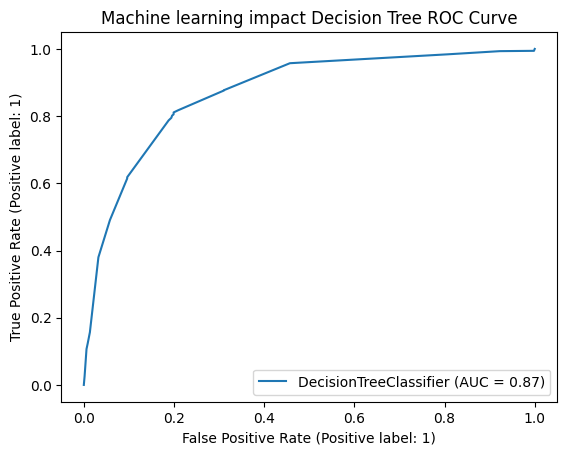

In [37]:
RocCurveDisplay.from_estimator(tree_clf, X_test, y_test)
plt.title("Machine learning impact Decision Tree ROC Curve")
plt.show()

### Interpretation

+ Can machine learning models ,accurately predict whether a customer will subscribe to a term deposit ?
**YES With an accuracy of 80% and a ROC-AUC of 0.87.**

+ Precision- 82% of customers did not subscribe, while 79% of the prediction did actually subscribe

+ Recall - The model was able to identify 80% of non_subscribers and 80% of subscribers



## Conclusions

+ predicting whether a customer will subscribe to a term deposit was successfully addressed using a Decision Tree model.
+ The model was able to correctly predict customer behavior 79%(ROC-AUC) of the time, and it was very good at telling the difference between people who would and wouldn’t subscribe to a term deposit.
+ The precision and recall scores show that the model performs well in identifying both positive and negative classes.This helps avoid wasting time on the wrong people and increases the chances of getting real subscribers

## RECCOMENDATIONS

**Customer Segmentation Objective**
+ Target High-Value Groups : Retired individuals,Tertiary-educated professionals Customers with high balance and no existing loans
+ Avoid Low-Response Groups :job_entrepreneur, job_housemaid, job_self-employed


**Campaign Optimization**
+  Use past campaign data to improve the timing, message, and frequency of calls.
+ Focus marketing campaigns in months with historically high subscription rates — especially December, March, and September.

**Use of Machine learning models strategy**
+ Regularly update the models with new customer data to keep predictions accurate over time.
+ Continue using machine learning models  to predict customer responses.

